In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels pmdarima


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\poorn\Downloads\Sales_Data.csv", parse_dates=["Date"], index_col="Date")

# Display first few rows
df.head()


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Sales
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-06-05,5,CUST005,Male,30,Beauty,2,50,100


In [13]:
print(df.columns)



Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Sales'],
      dtype='object')


In [14]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces
df.rename(columns={'date': 'Date', 'DATE': 'Date'}, inplace=True)  # Fix case issues


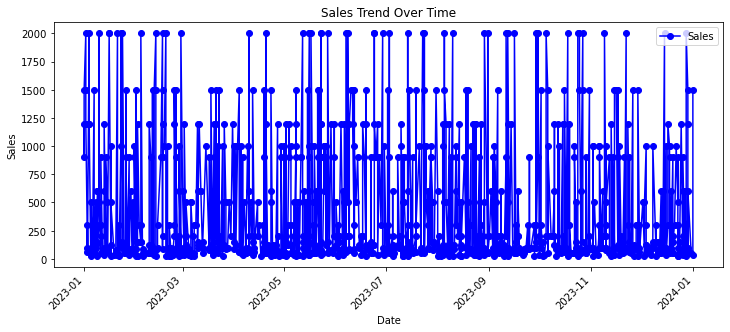

In [15]:
df['Sales'].plot(marker='o', linestyle='-', figsize=(12,5), color='blue', label='Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [16]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

# Check stationarity
adf_test(df['Sales'])


ADF Statistic: -31.776013873379462
p-value: 0.0
Data is stationary


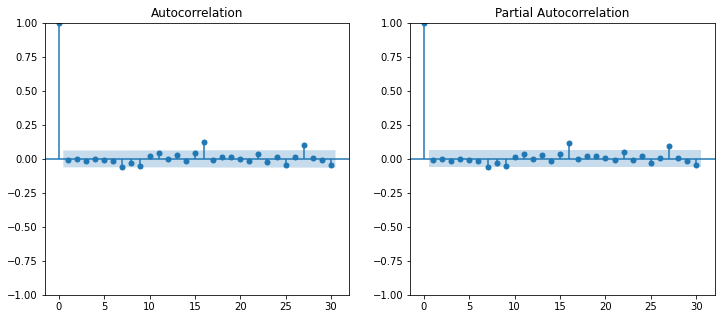

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

plot_acf(df['Sales'].dropna(), ax=ax[0])
plot_pacf(df['Sales'].dropna(), ax=ax[1])

plt.show()


In [18]:
auto_model = auto_arima(df['Sales'], seasonal=False, trace=True, suppress_warnings=True)
auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16180.713, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15894.034, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16178.714, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15782.854, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15716.209, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=15678.467, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=15655.464, Time=0.36 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=15653.465, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=15676.469, Time=0.21 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=1.83 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -7820.733
Date:                Tue, 04 Mar 2025   AIC                          15653.465
Time:                        14:03:26   BIC                          15682.906
Sample:                             0   HQIC                         15664.655
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8314      0.032    -26.007      0.000      -0.894      -0.769
ar.L2         -0.6610      0.040    -16.660      0.000      -0.739      -0.583
ar.L3         -0.4994      0.042    -11.872      0.000      -0.582      -0.417
ar.L4         -0.3230      0.041     -7.955      0.000      -0.403      -0.243
ar.L5         -0.1570      0.032     -4.856      0.000      -0.220      -0.094
sigma2      3.699e+05   1.48e+04     25.052      0.000    3.41e+05    3.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               198.42
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             1.06
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Set ARIMA order based on auto_arima
p, d, q = 1, 1, 1  # Replace with best values from auto_arima

model = ARIMA(df['Sales'], order=(p, d, q))
model_fit = model.fit()

# Print summary
print(model_fit.summary())


C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7742.526
Date:                Tue, 04 Mar 2025   AIC                          15491.052
Time:                        14:03:33   BIC                          15505.772
Sample:                             0   HQIC                         15496.647
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0055      0.033     -0.164      0.870      -0.071       0.060
ma.L1         -0.9999      0.053    -18.908      0.000      -1.104      -0.896
sigma2      3.137e+05   2.33e+04     13.482      0.0

In [20]:
# Forecast 30 days ahead
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for future predictions
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Sales": forecast.values})

# Display forecast table
forecast_df.head()


C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Date,Forecasted_Sales
0,2023-12-05,457.650993
1,2023-12-06,455.808695
2,2023-12-07,455.818747
3,2023-12-08,455.818692
4,2023-12-09,455.818692


In [21]:
# Forecast 30 days ahead
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for future predictions
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Sales": forecast.values})

# Display forecast table
forecast_df.head()


C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Date,Forecasted_Sales
0,2023-12-05,457.650993
1,2023-12-06,455.808695
2,2023-12-07,455.818747
3,2023-12-08,455.818692
4,2023-12-09,455.818692


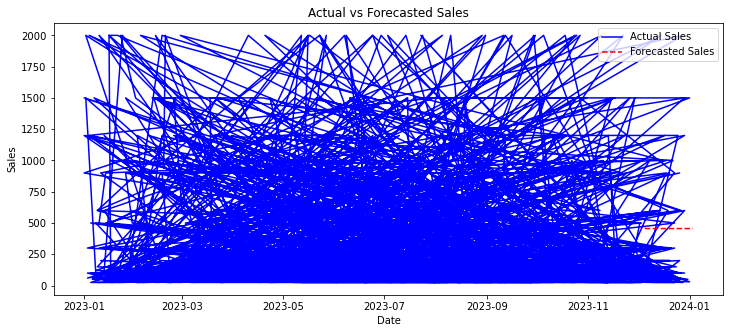

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Sales'], label="Actual Sales", color="blue")
plt.plot(forecast_df["Date"], forecast_df["Forecasted_Sales"], label="Forecasted Sales", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Forecasted Sales")
plt.legend()
plt.show()


In [23]:
# Compare forecasted values with actual last 30 days (if available)
actual = df['Sales'].iloc[-forecast_steps:].values
predicted = forecast.values[:len(actual)]

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse:.2f}")

# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual, predicted) * 100
print(f"MAPE: {mape:.2f}%")


RMSE: 377.79
MAPE: 496.30%


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\poorn\Downloads\heart_disease.csv")

# Check for missing values
print(df.isnull().sum())

# Convert gender to numeric
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# Convert Blood Pressure column
df['systolic_BP'] = df['blood pressure'].apply(lambda x: 120 if x == 'systolic' else 80)  
df.drop(columns=['blood pressure'], inplace=True)  # Drop original column


age               0
gender            0
heart disease     0
blood pressure    0
cholesterol       0
dtype: int64


In [34]:
scaler = StandardScaler()
df[['age', 'cholesterol', 'systolic_BP']] = scaler.fit_transform(df[['age', 'cholesterol', 'systolic_BP']])


In [35]:
# Split data
X = df[['age', 'gender', 'cholesterol', 'systolic_BP']]  # Features
y = df['heart disease']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.67      0.54        15
           1       0.74      0.54      0.62        26

    accuracy                           0.59        41
   macro avg       0.60      0.60      0.58        41
weighted avg       0.63      0.59      0.59        41


Confusion Matrix:
 [[10  5]
 [12 14]]
